# DS4A Project - Team 18 - Vaccine Acceptance PCA

---
Authorship: Marie-anne

---

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [56]:
features = pd.read_csv(os.path.join(os.getcwd(), 'Data/training_set_features.csv'))
labels = pd.read_csv(os.path.join(os.getcwd(), 'Data/training_set_labels.csv'))
imp_feat = pd.read_csv(os.path.join(os.getcwd(), 'Data/imputed_train_hot_encoded.csv'))
imp_feat_not_hot = pd.read_csv(os.path.join(os.getcwd(), 'Data/imputed_train.csv'))

In [57]:
imp_feat.drop('Unnamed: 0', axis=1, inplace=True)

# PCA

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [59]:
#Scaling
scaler = StandardScaler()
std_df = scaler.fit_transform(imp_feat)

In [60]:
pca = PCA()
pca = pca.fit(std_df) 
feat = range(1, pca.n_components_ + 1)

### Elbow plot

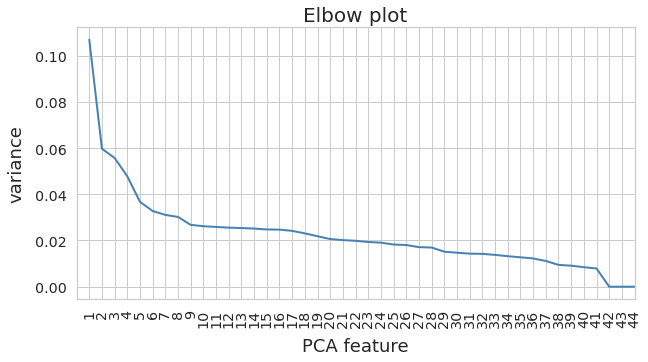

In [8]:
sns.set_theme(style='whitegrid', font_scale=1.3)
plt.figure(figsize=(10,5))
plt.plot(feat, pca.explained_variance_ratio_, scalex=False, linewidth=2, color='steelblue')
plt.xticks(feat, rotation=90)
plt.ylabel('variance', fontsize=18, labelpad=10)
plt.xlabel('PCA feature', fontsize=18, labelpad=10)
plt.title('Elbow plot', fontsize=20)
plt.savefig(os.path.join(os.getcwd(), 'Graphs/PCA_elbow.png'), bbox_inches='tight')

### Explained variance plot

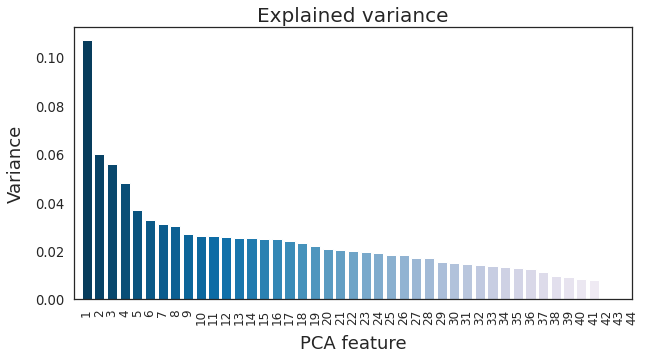

In [9]:
sns.set_theme(style='white', font_scale=1.2)
plt.figure(figsize=(10,5))
plt.bar(feat, pca.explained_variance_ratio_, color=sns.color_palette('PuBu_r', 45, desat=0.9))
plt.xticks(feat, rotation=90, fontsize=12)
plt.ylabel('Variance', fontsize=18, labelpad=10)
plt.xlabel('PCA feature', fontsize=18, labelpad=10)
plt.title('Explained variance', fontsize=20)
plt.xlim(0, 44)
plt.savefig(os.path.join(os.getcwd(), 'Graphs/PCA_ex_var.png'), bbox_inches='tight')

### Cumulative variance

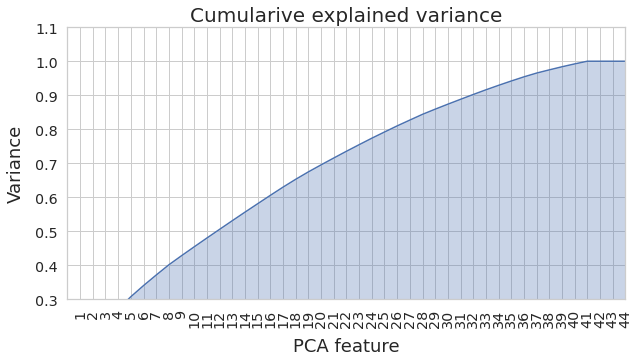

In [10]:
sns.set_theme(style='whitegrid', font_scale=1.3)
plt.figure(figsize=(10,5))
plt.plot(feat, pca.explained_variance_ratio_.cumsum(), scalex=False, )
plt.fill_between(feat, pca.explained_variance_ratio_.cumsum(), alpha=0.3)
plt.xticks(feat, rotation=90)
plt.ylim(0.3, 1.1)
plt.xlim(0, 44)
plt.ylabel('Variance', fontsize=18, labelpad=10)
plt.xlabel('PCA feature', fontsize=18, labelpad=10)
plt.title('Cumularive explained variance', fontsize=20)
plt.savefig(os.path.join(os.getcwd(), 'Graphs/PCA_ex_var_cum.png'), bbox_inches='tight')

### test plot 1st PC

In [ ]:
plt.scatter(imp_feat.iloc[:,0], imp_feat.iloc[:,1])
mean = pca.mean_
first_pc = pca.components_[0, :]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.03)
plt.savefig(os.path.join(os.getcwd(), 'Graphs/PCA_vs_feat.png'), bbox_inches='tight')

### PCA for scatterplot

In [62]:
imp_feat_small = imp_feat.copy()
imp_feat_small.drop(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', ], axis=1, inplace=True)

In [63]:
imp_feat_small = imp_feat_small.loc[:, ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal']]

In [64]:
model = PCA() 
transformed = model.fit_transform(std_df)

#get PC1 and PC2
xs = transformed[:,0]
ys = transformed[:,1]

In [65]:
# add PC1 and PC2 to columns
imp_feat_small_PCA = imp_feat_small.copy()
imp_feat_small_PCA['PC 1'] = xs
imp_feat_small_PCA['PC 2'] = ys

In [66]:
imp_feat_small.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal'],
      dtype='object')

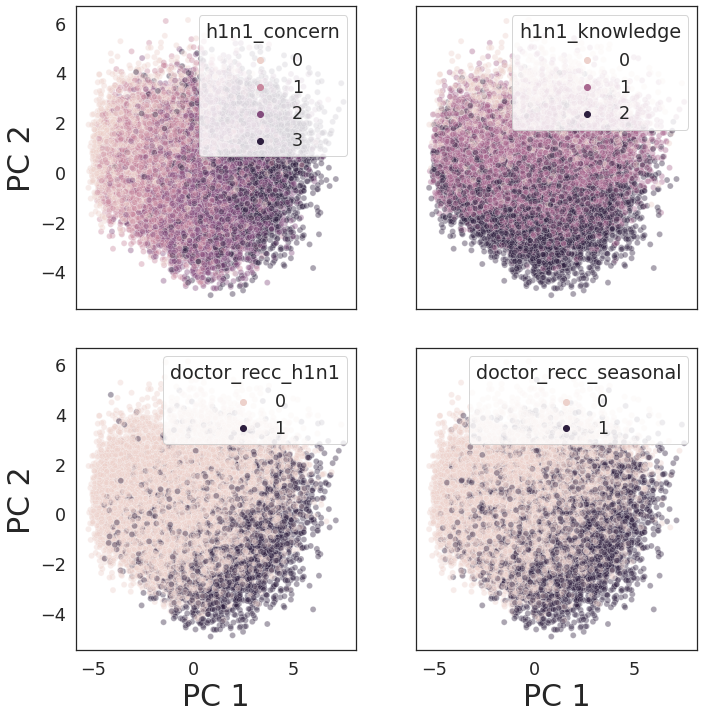

In [69]:
# Plotting scatter plots

plt.rcParams.update({'axes.labelsize': 30})
fig, axes = plt.subplots(2, 2,  sharex=True, sharey=True, figsize=(10,10))
plt.tight_layout()

sns.set(style='white', font_scale=1.6)

for ax, col in zip(axes.flatten(), imp_feat_small_PCA.columns[:-2]):
    sns.set_palette(sns.cubehelix_palette(n_colors=len(imp_feat[col].value_counts())))
    sns.scatterplot(data=imp_feat_small_PCA, ax=ax,
                    x='PC 1', y='PC 2',
                    hue=col,
                    alpha=0.4)

plt.savefig(os.path.join(os.getcwd(), 'Graphs/PCA_scatter.png'), bbox_inches='tight')

## MCA for categorical data

In [ ]:
! pip install prince

In [26]:
import prince

### MCA fit_transform 
using raw features as MCA impute and encode

In [100]:
df_mca = features.dropna().drop(['respondent_id', 'employment_industry', 'employment_occupation'], axis=1)

In [101]:
mca = prince.MCA(n_components=33, random_state=42, benzecri=True)

In [102]:
mca = mca.fit(df_mca)

### Scatterplot

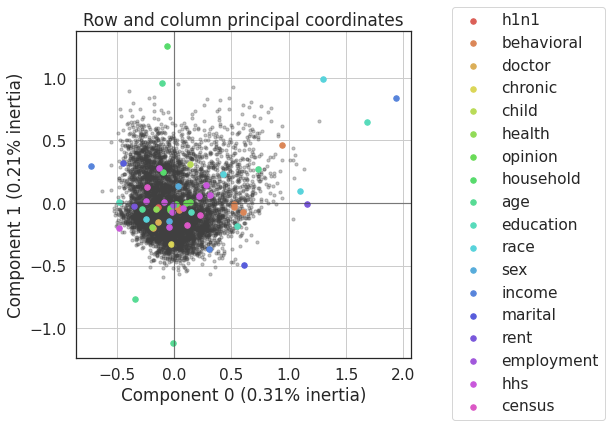

In [116]:
sns.set_palette(sns.hls_palette(20, l=.6))
ax = mca.plot_coordinates(X=df_mca,
                          ax=None,
                          figsize=(6, 6),
                          show_row_points=True,
                          row_points_size=10,
                          row_points_alpha=0.3,
                          show_row_labels=False,
                          show_column_points=True,
                          column_points_size=30,
                          show_column_labels=False,
                          legend_n_cols=1)
plt.legend(loc='best', bbox_to_anchor=(1.1,1.1))
plt.savefig(os.path.join(os.getcwd(), 'Graphs/MCA.png'), bbox_inches='tight')


### Eigenvalues

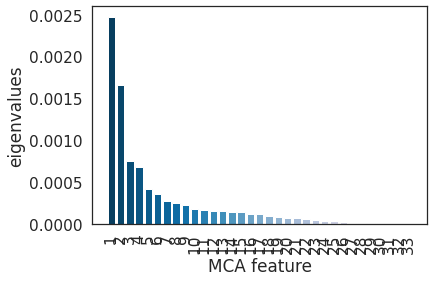

In [123]:
plt.bar(range(1,mca.n_components+1), mca.eigenvalues_, color=sns.color_palette('PuBu_r', 33, desat=0.9))
plt.xticks(range(1,mca.n_components+1), rotation=90)
plt.ylabel('eigenvalues')
plt.xlabel('MCA feature')
plt.savefig(os.path.join(os.getcwd(), 'Graphs/MCA_eigenvalues.png'), bbox_inches='tight')

### Explained Inertia

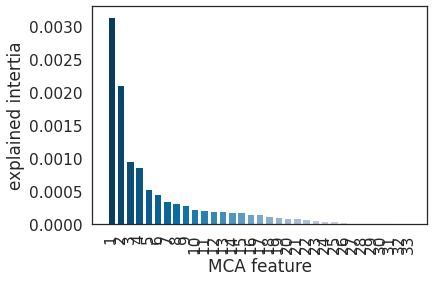

In [119]:
plt.bar(range(1,mca.n_components+1), mca.explained_inertia_, color=sns.color_palette('PuBu_r', 33, desat=0.9))
plt.xticks(range(1,mca.n_components+1), rotation=90)
plt.ylabel('explained intertia')
plt.xlabel('MCA feature')
plt.savefig(os.path.join(os.getcwd(), 'Graphs/MCA_explained_inertia.png'), bbox_inches='tight')

### Scatterplot of PC1 and PC2

In [131]:
transformed = mca.fit_transform(df_mca)

#get PC1 and PC2
xs_mca = transformed.iloc[:,0]
ys_mca = transformed.iloc[:,1]

In [132]:
# add PC1 and PC2 to columns
df_mca_PCA = df_mca.copy()
df_mca_PCA['PC 1'] = xs_mca
df_mca_PCA['PC 2'] = ys_mca

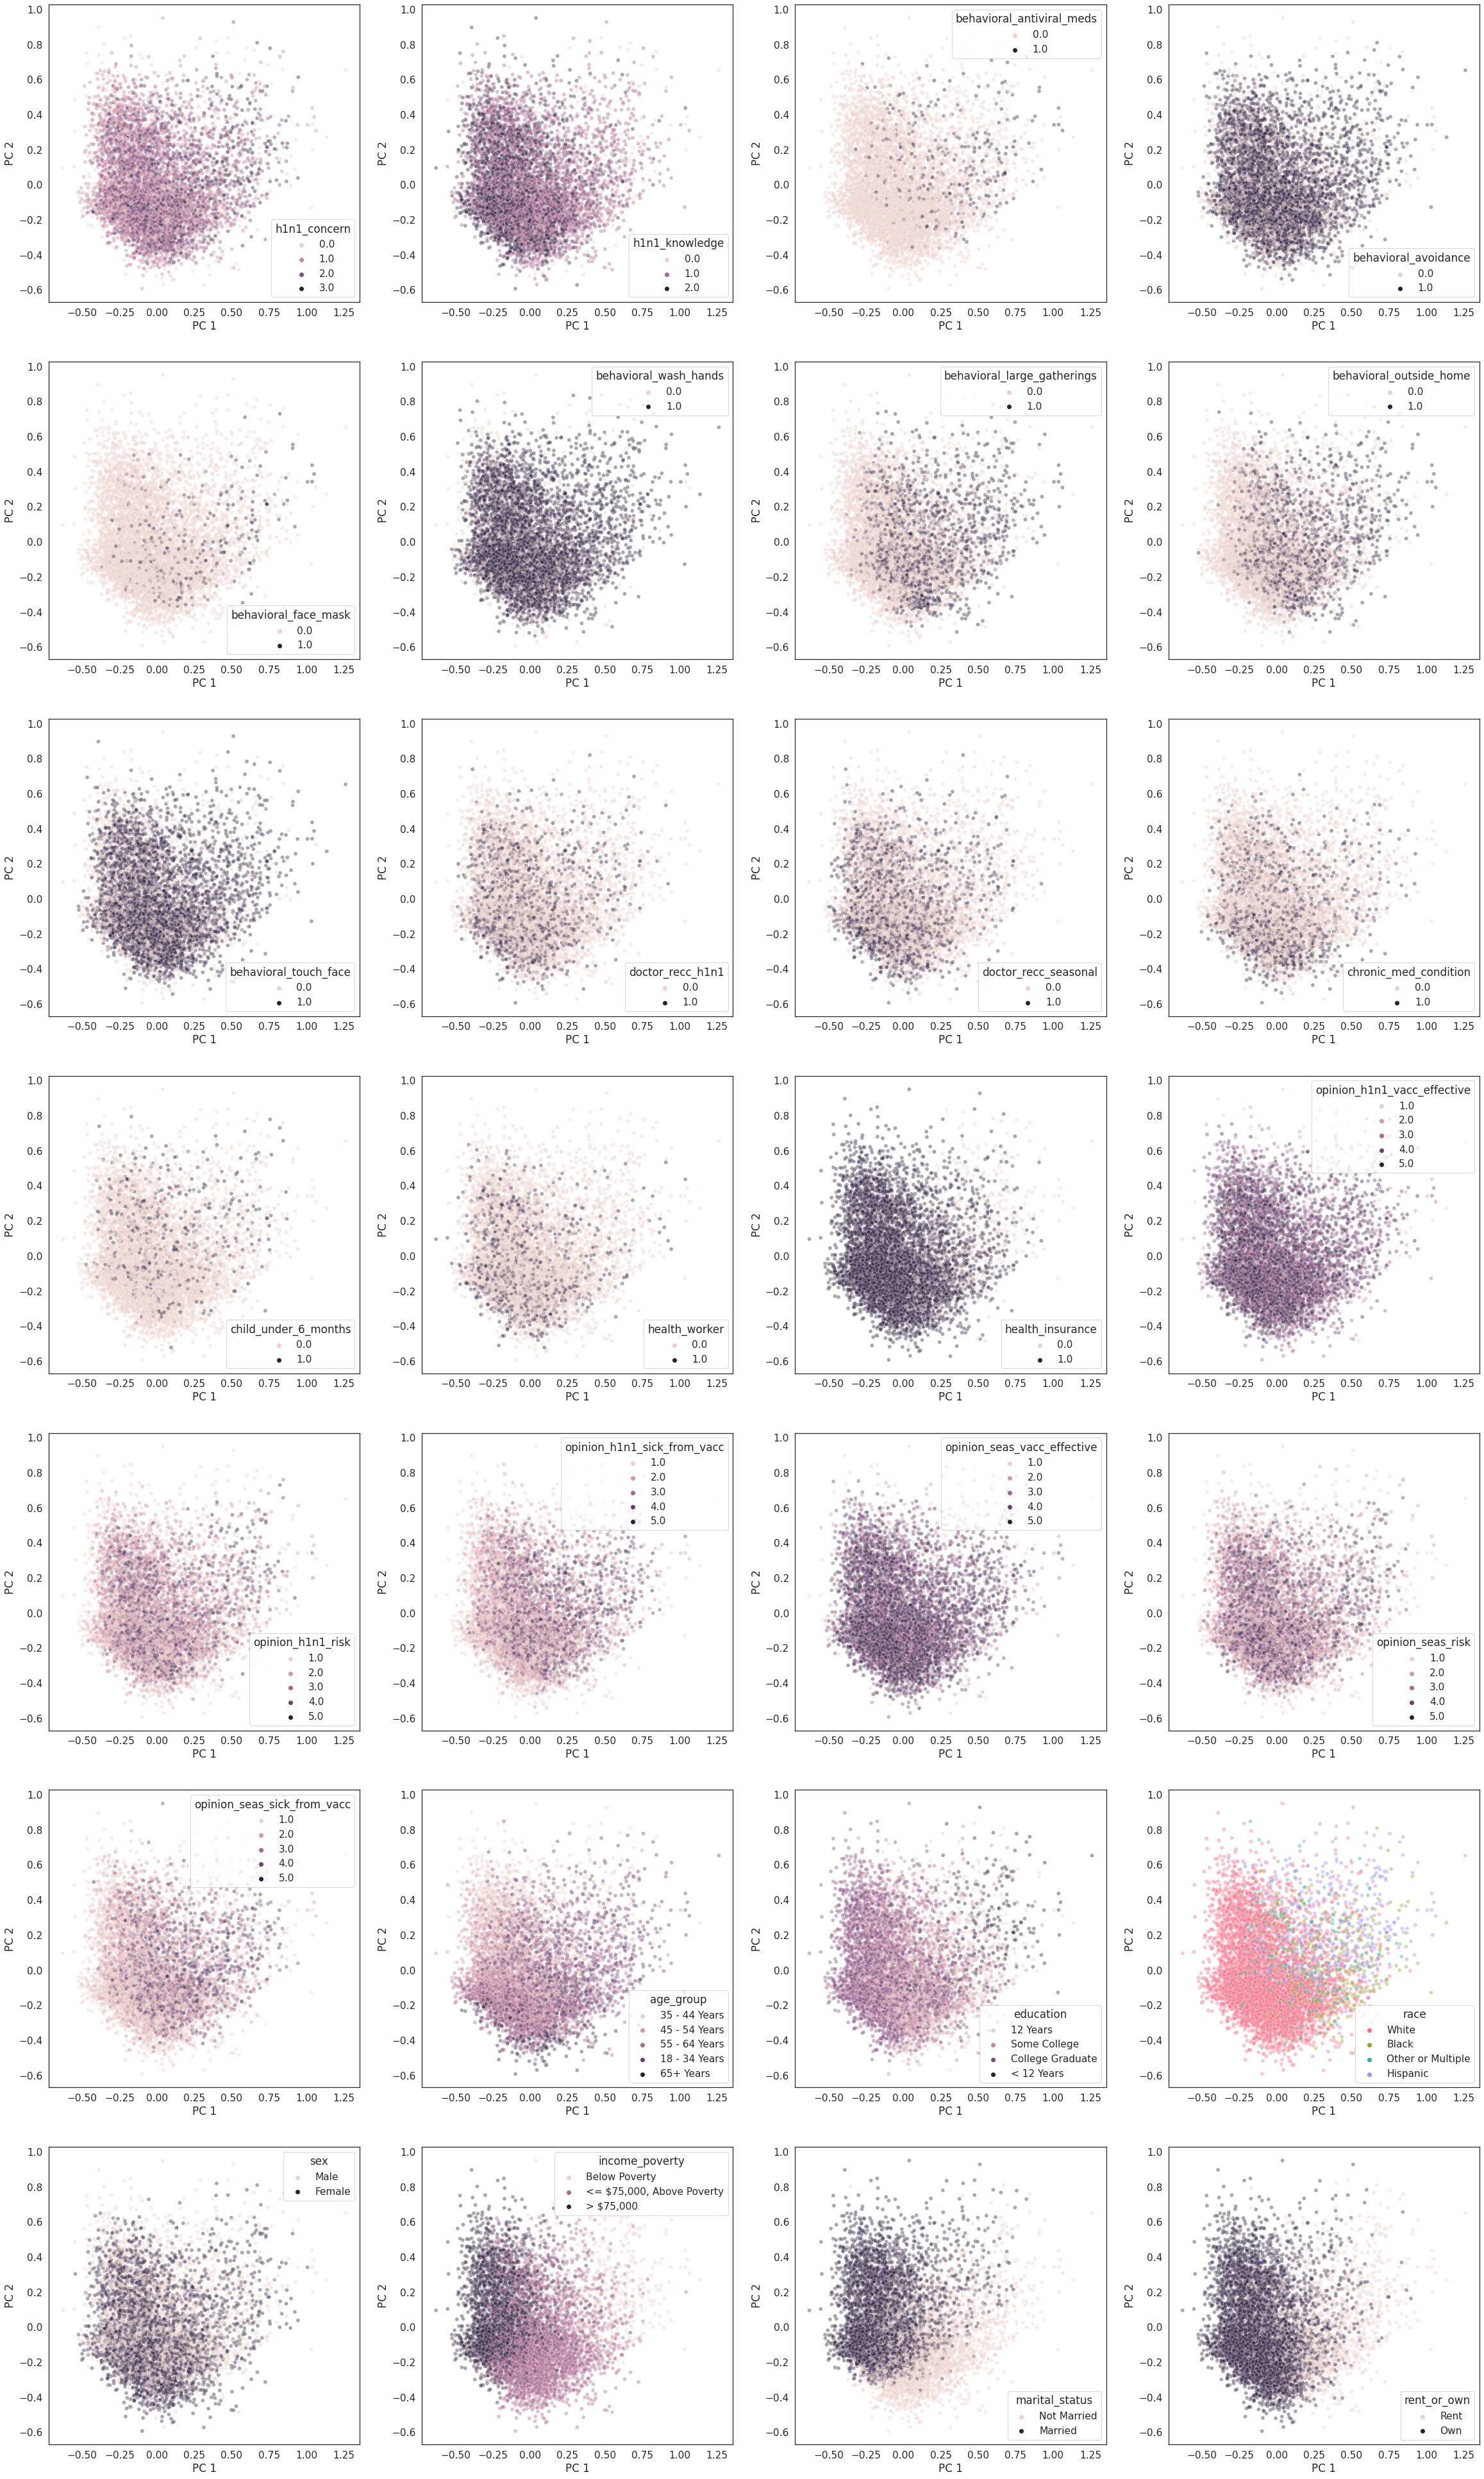

In [135]:
# Plotting scatter plots

fig, axes = plt.subplots(7, 4,  sharex=False, figsize=(40,70))

sns.set(style='white', font_scale=1.4)

for ax, col in zip(axes.flatten(), df_mca_PCA.columns[:-2]):
    sns.set_palette(sns.cubehelix_palette(n_colors=len(imp_feat[col].value_counts())))
    sns.scatterplot(data=df_mca_PCA, ax=ax,
                    x='PC 1', y='PC 2',
                    hue=col,
                    alpha=0.4)
plt.savefig(os.path.join(os.getcwd(), 'Graphs/MCA_scatter.png'), bbox_inches='tight')